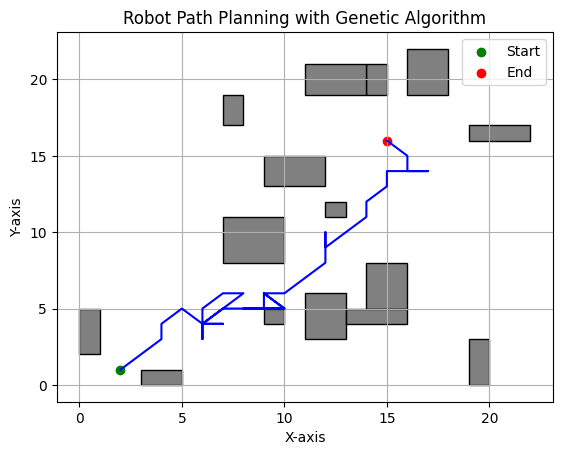

In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=100,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=500
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





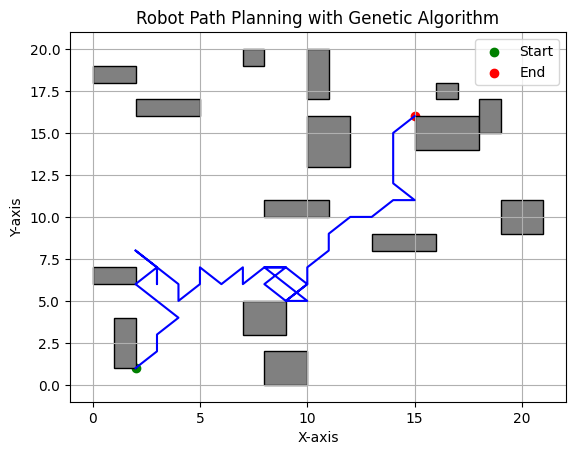

In [5]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=600,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=50
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





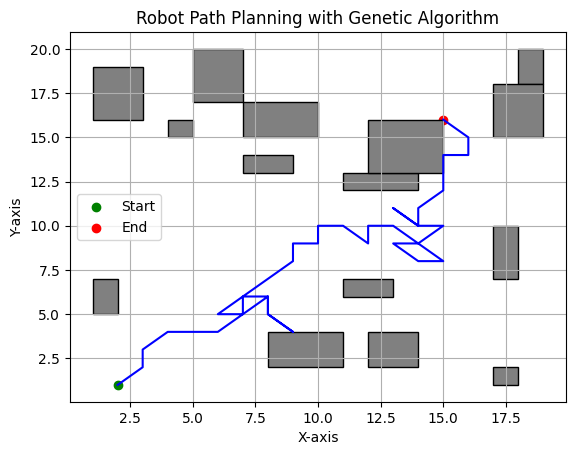

In [13]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=100,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=250
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





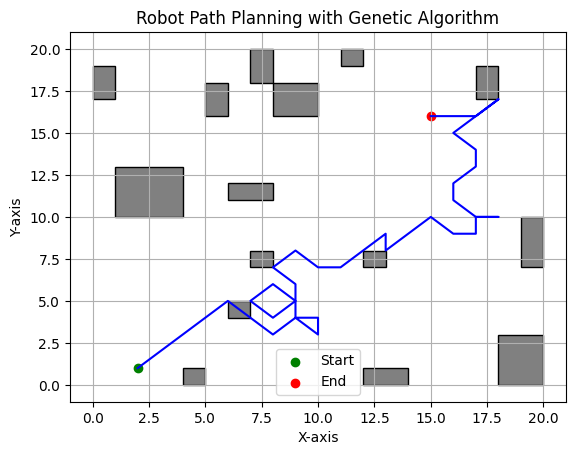

In [3]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=100,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=1000
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





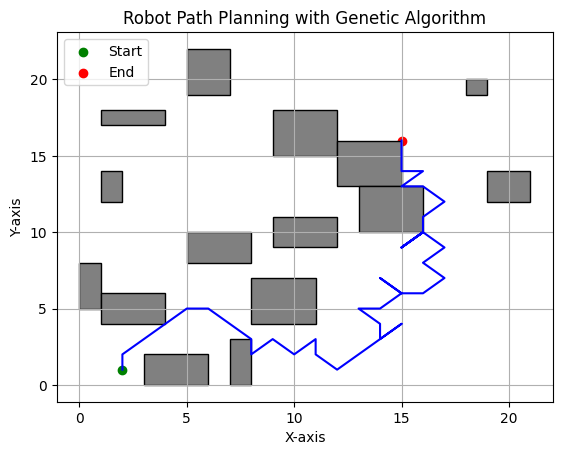

In [4]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=100,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=5000
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





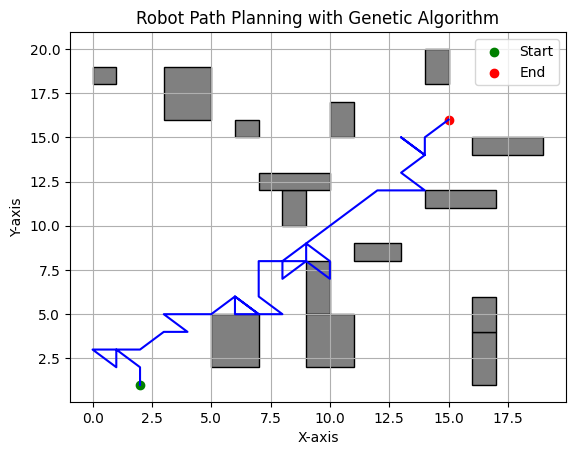

In [6]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=50,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=200
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





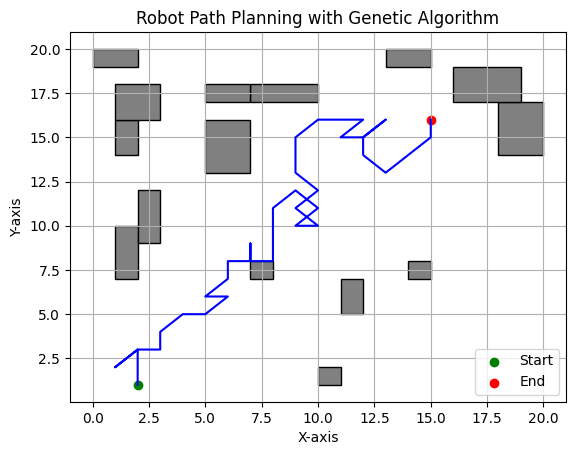

In [9]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=50,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=500
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





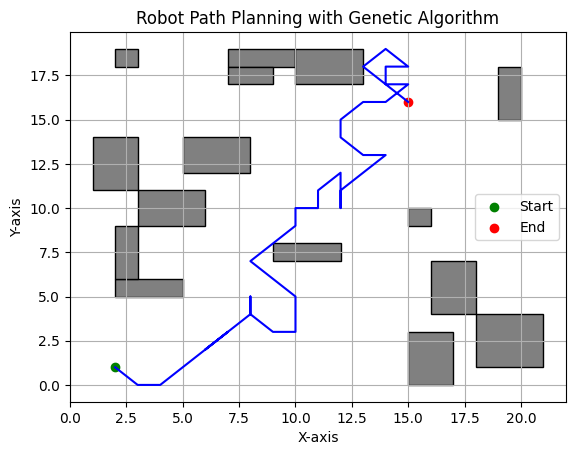

In [11]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x < obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width > obstacle.x and
            new_obstacle.y < obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height > obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        fitness_values = [max(1e-10, self.fitness_function(ind)) for ind in self.population]
        return random.choices(self.population, weights=fitness_values, k=2)

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual):
        mutated_individual = Individual(individual.genes[:])
        mutation_point = random.randint(1, len(mutated_individual.genes) - 1)
        mutated_individual.genes[mutation_point] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        for _ in range(self.iterations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = new_population

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (2, 1)
end_point = (15, 16)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=30,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=5000
)

genetic_algorithm.initialize_population()
genetic_algorithm.evolve()

best_individual = max(genetic_algorithm.population, key=genetic_algorithm.fitness_function)
genetic_algorithm.plot_solution(best_individual)





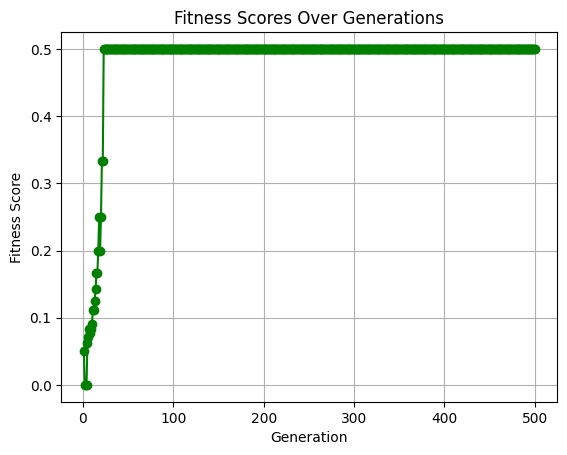

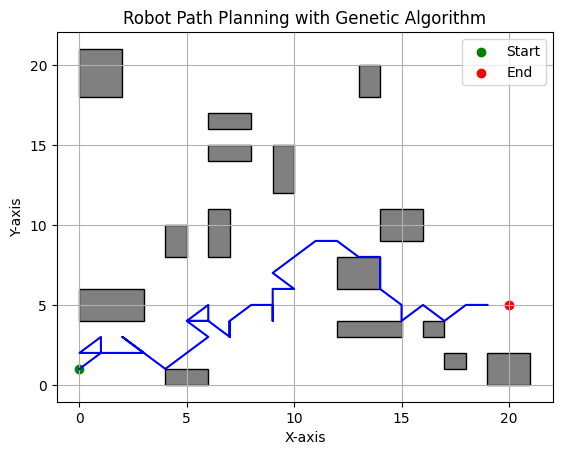

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Individual:
    def __init__(self, genes=None):
        self.genes = genes or []  # Represents the path as a sequence of moves

class Obstacle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

def check_collision(new_obstacle, existing_obstacles):
    for obstacle in existing_obstacles:
        if (
            new_obstacle.x <= obstacle.x + obstacle.width and
            new_obstacle.x + new_obstacle.width >= obstacle.x and
            new_obstacle.y <= obstacle.y + obstacle.height and
            new_obstacle.y + new_obstacle.height >= obstacle.y
        ):
            return True  # Collision detected
    return False

class Graph:
    def __init__(self, width, height, start, end, num_obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.end = end
        self.obstacles = self.generate_random_obstacles(num_obstacles)

    def generate_random_obstacles(self, num_obstacles):
        obstacles = []
        for _ in range(num_obstacles):
            while True:
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
                width = random.randint(1, 3)  # Adjust the range as needed
                height = random.randint(1, 3)  # Adjust the range as needed
                new_obstacle = Obstacle(x, y, width, height)

                if not check_collision(new_obstacle, obstacles):
                    obstacles.append(new_obstacle)
                    break

        return obstacles

    def is_valid_move(self, x, y):
        for obstacle in self.obstacles:
            if obstacle.x <= x < obstacle.x + obstacle.width and obstacle.y <= y < obstacle.y + obstacle.height:
                return False  # Robot will hit an obstacle if it moves to (x, y)
        return 0 <= x < self.width and 0 <= y < self.height

class GeneticAlgorithm:
    def __init__(self, population_size, graph, start, end, iterations, tournament_size=5):
        self.population_size = population_size
        self.graph = graph
        self.start = start
        self.end = end
        self.iterations = iterations
        self.tournament_size = tournament_size
        self.population = []

    def generate_random_individual(self):
        genes = [(0, 0)]  # Initial position
        for _ in range(self.graph.width + self.graph.height):  # Max moves = width + height
            move = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])
            genes.append(move)
        return Individual(genes)

    def initialize_population(self):
        self.population = [self.generate_random_individual() for _ in range(self.population_size)]

    def fitness_function(self, individual):
        x, y = self.start
        for move in individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return 0  # Penalize paths that hit obstacles
        return 1 / (abs(x - self.end[0]) + abs(y - self.end[1]) + 1)

    def select_parents(self):
        tournament_size = min(self.tournament_size, len(self.population))

        if tournament_size > 0:
            tournament = random.choices(self.population, k=tournament_size)
            best_parent = max(tournament, key=self.fitness_function)
        else:
            # If the tournament size is zero or the population is empty, generate a new random individual
            if len(self.population) > 0:
                best_parent = random.choice(self.population)
            else:
                best_parent = self.generate_random_individual()

        return best_parent

    def crossover(self, parent1, parent2):
        crossover_point = random.randint(1, len(parent1.genes) - 1)
        child_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
        return Individual(child_genes)

    def mutate(self, individual, mutation_rate=0.1):
        mutated_individual = Individual(individual.genes[:])

        for i in range(1, len(mutated_individual.genes)):  # Start from index 1 to skip the initial position
            if random.random() < mutation_rate:
                mutated_individual.genes[i] = random.choice([(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)])

        # Ensure the mutated path is valid
        x, y = self.start
        for move in mutated_individual.genes:
            x += move[0]
            y += move[1]
            if not self.graph.is_valid_move(x, y):
                return individual  # If the mutation results in an invalid path, revert to the original individual

        return mutated_individual

    def evolve(self):
        best_fitness_scores = []

        for generation in range(self.iterations):
            new_population = []
            for _ in range(self.population_size):
                parent1 = self.select_parents()
                parent2 = self.select_parents()
                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])

            self.population = new_population
            best_individual = max(self.population, key=self.fitness_function)
            best_fitness_scores.append(self.fitness_function(best_individual))

        # Plot the fitness scores
        self.plot_fitness_scores(best_fitness_scores)

        # Plot the best solution
        self.plot_solution(best_individual)

    def plot_fitness_scores(self, fitness_scores):
        plt.figure()
        plt.plot(range(1, len(fitness_scores) + 1), fitness_scores, marker='o', linestyle='-', color='g')
        plt.title('Fitness Scores Over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness Score')
        plt.grid(True)
        plt.show()

    def plot_solution(self, best_individual):
        fig, ax = plt.subplots()
        x, y = self.start
        path_x = [x]
        path_y = [y]
        for move in best_individual.genes:
            x += move[0]
            y += move[1]
            path_x.append(x)
            path_y.append(y)

        ax.plot(path_x, path_y, linestyle='-', color='b')
        ax.scatter(*self.start, marker='o', color='g', label='Start')
        ax.scatter(*self.end, marker='o', color='r', label='End')
        for obstacle in self.graph.obstacles:
            ax.add_patch(Rectangle((obstacle.x, obstacle.y), obstacle.width, obstacle.height, edgecolor='k', facecolor='gray'))
        ax.set_title('Robot Path Planning with Genetic Algorithm')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()
        ax.grid(True)
        plt.show()

# Example input
start_point = (0, 1)
end_point = (20, 5)

# Set the number of obstacles to generate randomly
num_obstacles = 15

graph = Graph(width=20, height=20, start=start_point, end=end_point, num_obstacles=num_obstacles)

genetic_algorithm = GeneticAlgorithm(
    population_size=50,
    graph=graph,
    start=start_point,
    end=end_point,
    iterations=500,
    tournament_size=5
)

genetic_algorithm.evolve()

